In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.append(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Code\DarianOthmanMasterThesis\Functions')
import Influencer_Characteristics as ic
import File_Opening as fo
import csv

In [2]:
dfins_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_en_disclosed_ad.csv')
dfins_nl = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_nl_disclosed_ad.csv')
dftt_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_en_disclosed_ad.csv')
dftt_nl = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_nl_disclosed_ad.csv')
dfyt_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_en_disclosed_ad.csv')
dfyt_nl = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_nl_disclosed_ad.csv')

In [3]:
dftt_en["caption"]=dftt_en["video_description"]
dfyt_en["caption"]=dfyt_en["description_video"]
dftt_nl["caption"]=dftt_nl["video_description"]
dfyt_nl["caption"]=dfyt_nl["description_video"]


# Assuming dfyt_nl is your DataFrame
dfyt_en["caption"] = dfyt_en["caption"].str.replace("\n", "", regex=False)
dfyt_en["caption"] = dfyt_en["caption"].str.replace(",", "", regex=False)
dfyt_nl["caption"] = dfyt_nl["caption"].str.replace("\n", "", regex=False)
dfyt_nl["caption"] = dfyt_nl["caption"].str.replace(",", "", regex=False)
dfins_nl["caption"] = dfins_nl["caption"].str.replace("\n", "", regex=False)
dfins_nl["caption"] = dfins_nl["caption"].str.replace(",", "", regex=False)
dftt_nl["caption"] = dftt_nl["caption"].str.replace("\n", "", regex=False)
dftt_nl["caption"] = dftt_nl["caption"].str.replace(",", "", regex=False)


def sampledate(df, file):
    # Sample 1050 rows without replacement
    sample_df = df.sample(n=1000, replace=False, random_state=42)
    
    video_descriptions = sample_df["caption"]
    
    # Create a new DataFrame with just the "video_description" column
    video_descriptions_df = pd.DataFrame(video_descriptions)
    
    # Save to CSV without index
    video_descriptions_df.to_csv(f"C:/Users/I6240624/Documents/BISS/Master Thesis/Data/AI_Generation/{file}.csv", index=False)
sampledate(dfyt_en, "sampleyten")
sampledate(dftt_en, "sampletten")
sampledate(dfins_en, "sampleinsen")
sampledate(dfyt_nl, "sampleytnl")
sampledate(dftt_nl, "samplettnl")
sampledate(dfins_nl, "sampleinsnl")

In [17]:
insinf_en = fo.get_unique_values(dfins_en, "username")
insinf_nl = fo.get_unique_values(dfins_nl, "username")
ttinf_en = fo.get_unique_values(dftt_en, "username")
ttinf_nl = fo.get_unique_values(dftt_nl, "username")
ytinf_en = fo.get_unique_values(dfyt_en, "channel_title")
ytinf_nl = fo.get_unique_values(dfyt_nl, "channel_title")

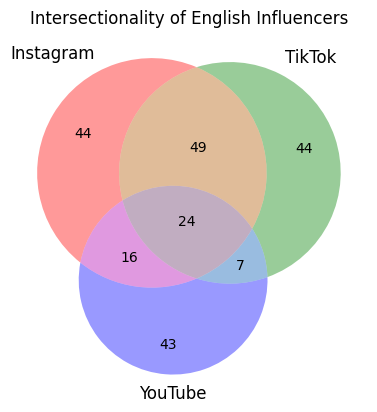

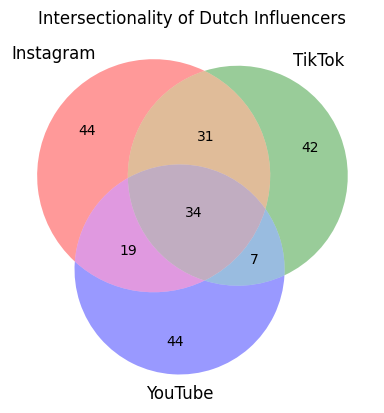

{'AMBERDOKTER',
 'ANIQUEDREAMON',
 'ANKNOOK',
 'ANNANOOSHIN',
 'ASHLEYGUIJT',
 'BEAUTYGLOSS',
 'BIBIBREIJMAN',
 'BOAZO_O',
 'BOBROWNN',
 'BOKADO',
 'CLONNYGAMES',
 'DARIO.DE.VRIES',
 'DAVEROELVINK',
 'DEE',
 'DEZOETEZUSJES',
 'DUNCANTROMP',
 'DUTCHPERFORMANTE',
 'EMMAKEUVEN',
 'ENZOKNOL',
 'ESMEEJOANNA',
 'EVA.KOPER',
 'GAINSBYBRAINS',
 'GAMEMENEER',
 'GIEL',
 'GINO_GK1',
 'GIO',
 'GIORGINAJUANITA',
 'GLENFONTEIN',
 'GLOWMOVIES',
 'HANWE',
 'HARM',
 'HARRIESNIJDERS',
 'HATO.DJ',
 'ICEMAN_HOF',
 'ITAINTOKBRO',
 'JADEANNA',
 'JADEKONAL',
 'JASEYHARDERS',
 'JEREMYFRIESER',
 'JESSEZIORR',
 'JOEYBRAVO',
 'JOOSTBOUHOF',
 'JORRAPTOR',
 'KALVIJN',
 'KWEBBELKOP',
 'LILLYVANBROOKLYN',
 'LINKTIJGER',
 'LISANNE.DIJKSTRA',
 'LORENZODINATELLE',
 'MATTHY',
 'MAXIMEANDSOPHIE',
 'MEESTERJESPER',
 'MELANIELATOOY',
 'MERPTV',
 'MILANKNOL',
 'MILJUSCHKA',
 'MOBICEPP',
 'MONICAGEUZE',
 'MRLOWLANDER',
 'NIENKEPLAS',
 'NIKKIETUTORIALS',
 'NILABKAR',
 'NINAWARINK',
 'NOAHALTINK',
 'NOCHTLII',
 'OFFICIALSAARX'

In [18]:
ic.find_common_elements_and_plot(insinf_en, ttinf_en, ytinf_en, "Instagram", "TikTok", "YouTube","Intersectionality of English Influencers")
ic.find_common_elements_and_plot(insinf_nl, ttinf_nl, ytinf_nl, "Instagram", "TikTok", "YouTube","Intersectionality of Dutch Influencers")

In [19]:
# Calculate the total length of all strings in the column
total_length = sum(len(word) for word in dfins_nl["caption"])

# Calculate the average length
average_length = total_length / len(dfins_nl["caption"])

print("Average length of the first column:", average_length)

Average length of the first column: 136.7110844537745


In [20]:
dfyt_nl = dfyt_nl.rename(columns={'channel_title': 'username'})
dfyt_en=dfyt_en.rename(columns={'channel_title': 'username'})
dfyt_en=dfyt_en.rename(columns={'description_video': 'caption'})
dfyt_nl = dfyt_nl.rename(columns={'description_video': 'caption'})
dfyt_nl = dfyt_nl.rename(columns={'published_at_video': 'date'})
dfyt_en=dfyt_en.rename(columns={'published_at_video': 'date'})
dftt_nl = dftt_nl.rename(columns={'create_time': 'date'})
dftt_en=dftt_en.rename(columns={'create_time': 'date'})
dftt_en=dftt_en.rename(columns={'video_description': 'caption'})
dftt_nl = dftt_nl.rename(columns={'video_description': 'caption'})

In [21]:
common_usernames = insinf_en.intersection(ttinf_en, ytinf_en)
b=dfyt_en.loc[dfyt_en['username'].isin(common_usernames)]
c=dftt_en.loc[dftt_en['username'].isin(common_usernames)]
d=dfins_en.loc[dfins_en['username'].isin(common_usernames)]
combined = pd.concat([b, c, d], ignore_index=True)
combined
combined.to_csv('combined_en.csv', index=False)

In [22]:
combined

,Unnamed: 0,video_id,title,caption,tags,category_id,date,duration,made_for_kids_video,username,...,comments_expected,is_ad,content_sponsor,type,language,post_url,ct_id,size,followers_collection_time,dt_year_mon
0,118,SqXgo0dCcKg,OnneDi - Wrong about Love (Official Music Video),STREAM 'Wrong About Love' nu OVERAL: https://o...,"onnedi,onnedi hondje,dionne,dionne dolly",22,2021-08-26T17:00:11Z,PT3M15S,False,ONNEDI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50,QNPrVpWyEh4,"5 Clothes ""TUCK-IN"" HACKS Every STYLISH Guy Sh...",Hi guys! Here is a TOP 5 TUCK-IN HACKS that ev...,"how to properly tuck in a shirt,military tuck ...",10,2023-07-31T14:41:41Z,PT1M6S,False,NOAHALTINK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52,upJeuj4DclI,5 HOODIE HACKS To Tie And Tuck better *quick a...,Hi guys! Here is a TOP 5 HOODIE HACKS that eve...,"teaching mens fashion,men's fashion,how to dre...",10,2023-07-30T13:09:04Z,PT1M8S,False,NOAHALTINK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57,IuquPMjU_hI,5 BRILLIANT CLOTHES HACKS YOU DIDN'T KNOW BEFO...,Hi guys! Here is a TOP 5 CLOTHES HACKS that ev...,"fashion hacks,clothing hacks,diy fashion,how t...",10,2023-07-28T12:13:10Z,PT1M11S,False,NOAHALTINK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,58,nNsVGBnmCVM,How to Tuck In Your Shirt the Right Way And St...,Hi guys! Here is a TOP 5 SHIRT HACKS that ever...,"How to tuck in your shirt,Tuck-in shirt,how to...",10,2023-07-27T14:15:50Z,PT1M12S,False,NOAHALTINK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29085,88063,NaN,NaN,Blueberry muffin!! Jammie,NaN,NaN,2012-03-04 13:02:10,NaN,NaN,ONNEDI,...,160,False,,photo,nl,https://www.instagram.com/p/HwF7szEV6C/,739411|139637681231584898,,,2012/03
29086,88064,NaN,NaN,Meet my mom <3,NaN,NaN,2012-03-03 14:38:55,NaN,NaN,ONNEDI,...,160,False,,photo,nl,https://www.instagram.com/p/HtsNb0EV6c/,739411|138961600782622364,,,2012/03
29087,88073,NaN,NaN,On my way!,NaN,NaN,2012-02-27 15:45:31,NaN,NaN,ONNEDI,...,160,False,,photo,nl,https://www.instagram.com/p/Hg725zEV5m/,739411|135371246477074022,,,2012/02
29088,88077,NaN,NaN,Forever in love! #shoes,NaN,NaN,2012-02-23 13:10:55,NaN,NaN,ONNEDI,...,160,False,,photo,nl,https://www.instagram.com/p/HWW_FwEV8K/,739411|132394331579440906,,,2012/02


In [23]:
selected_columns = combined[["caption", "date","username"]]

# Remove newlines from the "caption" column
selected_columns["caption"] = selected_columns["caption"].replace('\n', ' ', regex=True)
selected_columns["caption"] = selected_columns["caption"].replace(',', ' ', regex=True)

# Save the selected columns to a CSV file
selected_columns.to_csv("selected_data.csv", index=False)

C:\Users\I6240624\AppData\Local\Temp\ipykernel_6352\169802239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns["caption"] = selected_columns["caption"].replace('\n', ' ', regex=True)
C:\Users\I6240624\AppData\Local\Temp\ipykernel_6352\169802239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns["caption"] = selected_columns["caption"].replace(',', ' ', regex=True)


In [24]:
combined

,Unnamed: 0,video_id,title,caption,tags,category_id,date,duration,made_for_kids_video,username,...,comments_expected,is_ad,content_sponsor,type,language,post_url,ct_id,size,followers_collection_time,dt_year_mon
0,118,SqXgo0dCcKg,OnneDi - Wrong about Love (Official Music Video),STREAM 'Wrong About Love' nu OVERAL: https://o...,"onnedi,onnedi hondje,dionne,dionne dolly",22,2021-08-26T17:00:11Z,PT3M15S,False,ONNEDI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50,QNPrVpWyEh4,"5 Clothes ""TUCK-IN"" HACKS Every STYLISH Guy Sh...",Hi guys! Here is a TOP 5 TUCK-IN HACKS that ev...,"how to properly tuck in a shirt,military tuck ...",10,2023-07-31T14:41:41Z,PT1M6S,False,NOAHALTINK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52,upJeuj4DclI,5 HOODIE HACKS To Tie And Tuck better *quick a...,Hi guys! Here is a TOP 5 HOODIE HACKS that eve...,"teaching mens fashion,men's fashion,how to dre...",10,2023-07-30T13:09:04Z,PT1M8S,False,NOAHALTINK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57,IuquPMjU_hI,5 BRILLIANT CLOTHES HACKS YOU DIDN'T KNOW BEFO...,Hi guys! Here is a TOP 5 CLOTHES HACKS that ev...,"fashion hacks,clothing hacks,diy fashion,how t...",10,2023-07-28T12:13:10Z,PT1M11S,False,NOAHALTINK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,58,nNsVGBnmCVM,How to Tuck In Your Shirt the Right Way And St...,Hi guys! Here is a TOP 5 SHIRT HACKS that ever...,"How to tuck in your shirt,Tuck-in shirt,how to...",10,2023-07-27T14:15:50Z,PT1M12S,False,NOAHALTINK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29085,88063,NaN,NaN,Blueberry muffin!! Jammie,NaN,NaN,2012-03-04 13:02:10,NaN,NaN,ONNEDI,...,160,False,,photo,nl,https://www.instagram.com/p/HwF7szEV6C/,739411|139637681231584898,,,2012/03
29086,88064,NaN,NaN,Meet my mom <3,NaN,NaN,2012-03-03 14:38:55,NaN,NaN,ONNEDI,...,160,False,,photo,nl,https://www.instagram.com/p/HtsNb0EV6c/,739411|138961600782622364,,,2012/03
29087,88073,NaN,NaN,On my way!,NaN,NaN,2012-02-27 15:45:31,NaN,NaN,ONNEDI,...,160,False,,photo,nl,https://www.instagram.com/p/Hg725zEV5m/,739411|135371246477074022,,,2012/02
29088,88077,NaN,NaN,Forever in love! #shoes,NaN,NaN,2012-02-23 13:10:55,NaN,NaN,ONNEDI,...,160,False,,photo,nl,https://www.instagram.com/p/HWW_FwEV8K/,739411|132394331579440906,,,2012/02


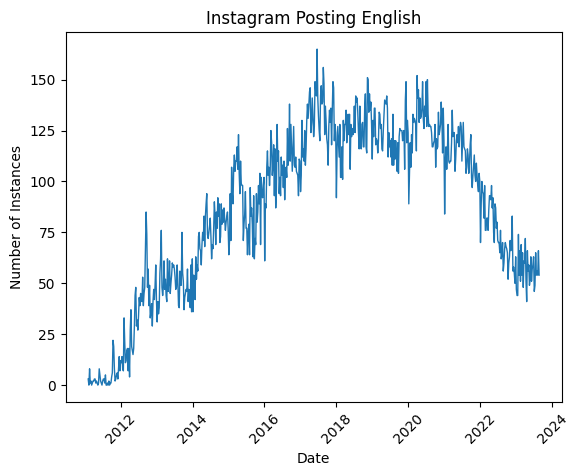

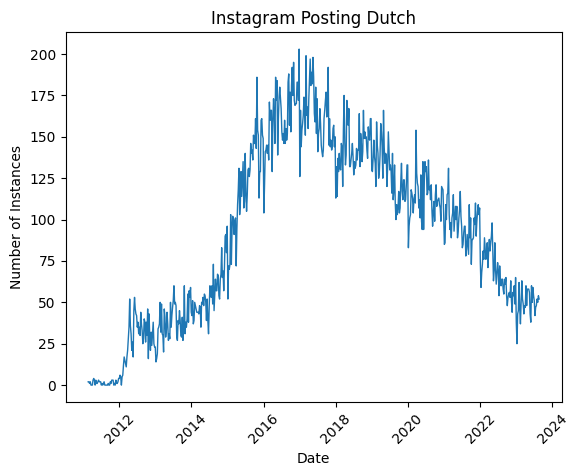

KeyError: 'create_time'

In [25]:
ic.plot_instances_by_week(dfins_en,"date", "Instagram Posting English")
ic.plot_instances_by_week(dfins_nl,"date", "Instagram Posting Dutch")
ic.plot_instances_by_week(dftt_en,"create_time", "TikTok Posting English")
ic.plot_instances_by_week(dftt_nl,"create_time", "TikTok Posting Dutch")
ic.plot_instances_by_week(dfyt_en,"published_at_video", "YouTube Posting English")
ic.plot_instances_by_week(dfyt_nl,"published_at_video", "YouTube Posting Dutch")

In [ ]:
ic.plot_instances_together(dfins_en,dftt_en,dfyt_en,"date","create_time","published_at_video","Instagram","TikTok","YouTube","Evolution of Posting per Week English")
ic.plot_instances_together(dfins_nl,dftt_nl,dfyt_nl,"date","create_time","published_at_video","Instagram","TikTok","YouTube","Evolution of Posting per Week Dutch")

In [ ]:
timediffins_en = ic.calculate_time_between_posts(dfins_en, "username", "date")
timediffins_nl = ic.calculate_time_between_posts(dfins_nl, "username", "date")
timedifftt_en = ic.calculate_time_between_posts(dftt_en, "username", "create_time")
timedifftt_nl = ic.calculate_time_between_posts(dftt_nl, "username", "create_time")
timediffyt_en = ic.calculate_time_between_posts(dfyt_en, "channel_title", "published_at_video")
timediffyt_nl = ic.calculate_time_between_posts(dfyt_nl, "channel_title", "published_at_video")

In [ ]:
ic.plot_time_between_posts(timediffyt_en, timedifftt_en, timediffins_en, "YouTube", "TikTok", "Instagram",
                           "Time Between Posts English", 0, 200)
ic.plot_time_between_posts(timediffyt_nl, timedifftt_nl, timediffins_nl, "YouTube", "TikTok", "Instagram",
                           "Time Between Posts Dutch", 0, 200)

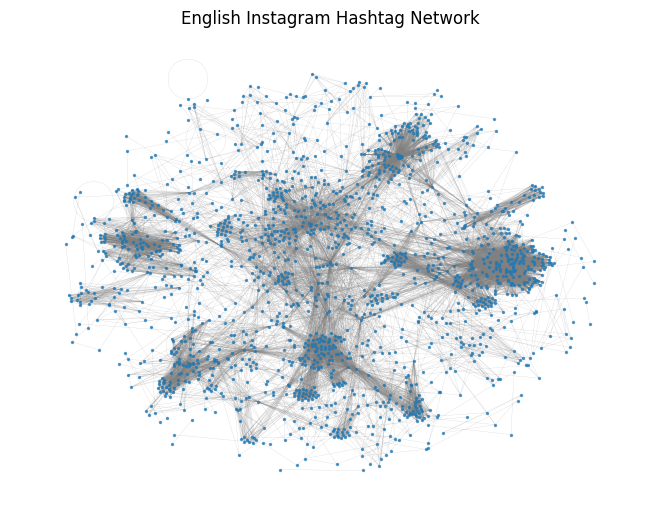

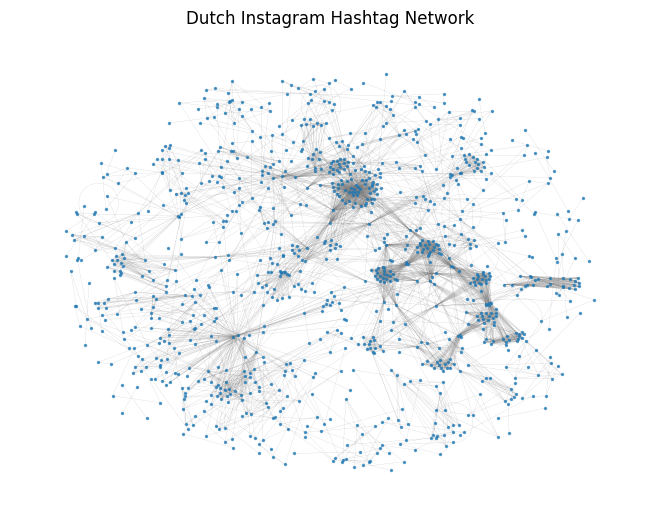

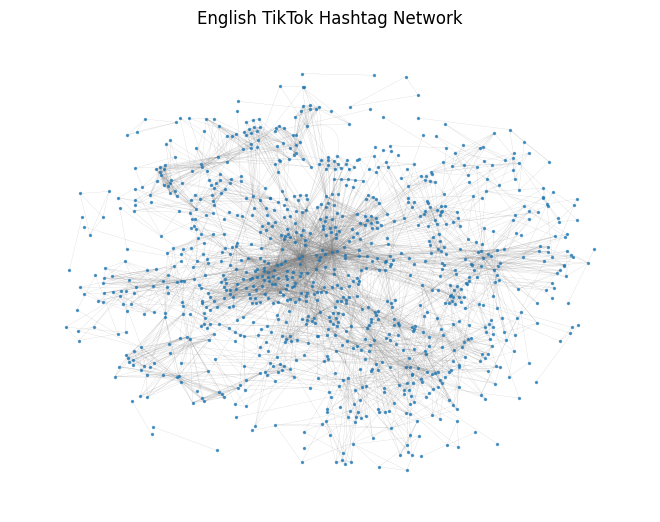

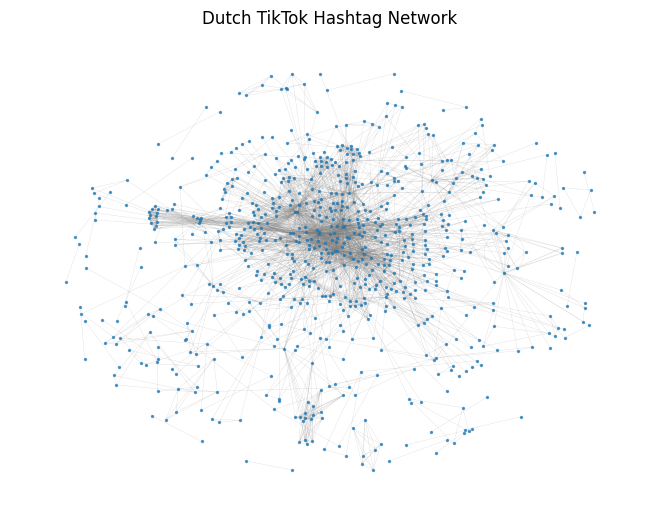

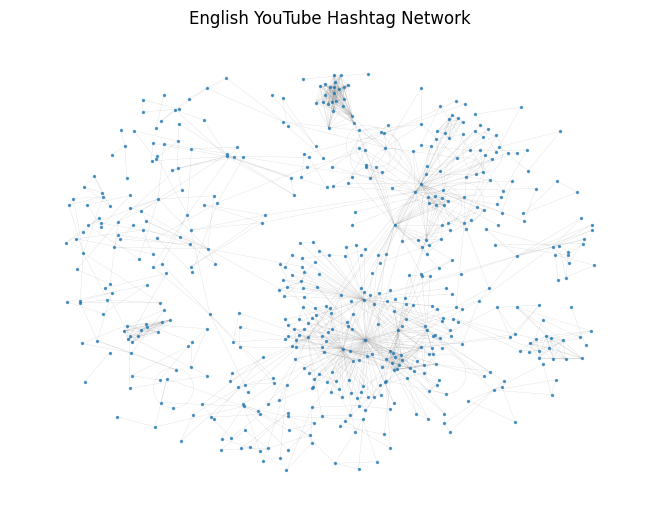

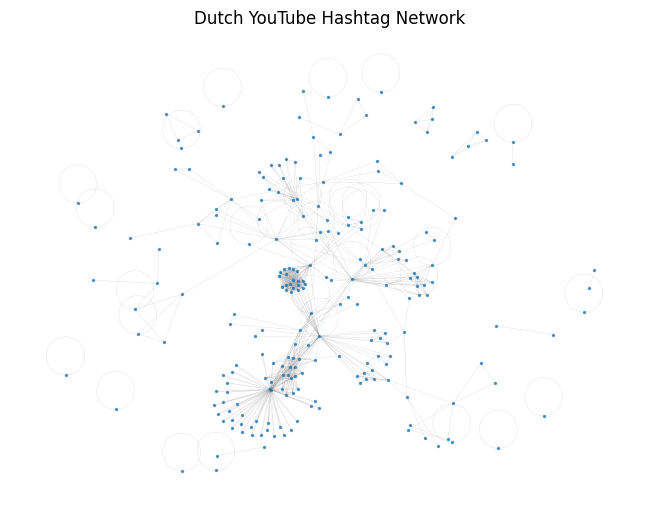

In [12]:
ic.draw_hashtag_network(dfins_en, "hastag", "English Instagram Hashtag Network", sample_size=500)
ic.draw_hashtag_network(dfins_nl, "hastag", "Dutch Instagram Hashtag Network", sample_size=500)
ic.draw_hashtag_network(dftt_en, "hastag", "English TikTok Hashtag Network", sample_size=500)
ic.draw_hashtag_network(dftt_nl, "hastag", "Dutch TikTok Hashtag Network", sample_size=500)
ic.draw_hashtag_network(dfyt_en, "hastag", "English YouTube Hashtag Network", sample_size=500)
ic.draw_hashtag_network(dfyt_nl, "hastag", "Dutch YouTube Hashtag Network", sample_size=500)

In [ ]:
unihasins_en=len(ic.get_unique_hashtags(dfins_en, "hastag"))
unihasins_nl=len(ic.get_unique_hashtags(dfins_nl, "hastag"))
unihastt_en=len(ic.get_unique_hashtags(dftt_en, "hashtag_names"))
unihastt_nl=len(ic.get_unique_hashtags(dftt_nl, "hashtag_names"))
unihasyt_en=len(ic.get_unique_hashtags(dfyt_en, "tags"))
unihasyt_nl=len(ic.get_unique_hashtags(dfyt_nl, "tags"))

# Data
platforms = ['Instagram English', 'Instagram Dutch', 'TikTok English', 'TikTok Dutch', 'YouTube English', 'YouTube Dutch']
unique_counts = [unihasins_en, unihasins_nl, unihastt_en, unihastt_nl, unihasyt_en, unihasyt_nl]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(platforms, unique_counts, color='skyblue')
plt.xlabel('Platforms')
plt.ylabel('Number of Unique Hashtags')
plt.title('Number of Unique Hashtags per Platform')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


In [ ]:
ic.draw_tag_network(dfins_en, "tagged_user", "English Instagram Tag Network", sample_size=500)
ic.draw_tag_network(dfins_nl, "tagged_user", "Dutch Instagram Tag Network", sample_size=500)
ic.draw_tag_network(dftt_en, "tagged_user", "English TikTok Tag Network", sample_size=500)
ic.draw_tag_network(dftt_nl, "tagged_user", "Dutch TikTok Tag Network", sample_size=500)
ic.draw_tag_network(dfyt_en, "tagged_user", "English YouTube Tag Network", sample_size=200)
ic.draw_tag_network(dfyt_nl, "tagged_user", "Dutch YouTube Tag Network", sample_size=200)

In [ ]:
unitagins_en=len(ic.get_unique_hashtags(dfins_en, "tagged_user"))
unitagins_nl=len(ic.get_unique_hashtags(dfins_nl, "tagged_user"))
unitagtt_en=len(ic.get_unique_hashtags(dftt_en, "tagged_user"))
unitagtt_nl=len(ic.get_unique_hashtags(dftt_nl, "tagged_user"))
unitagyt_en=len(ic.get_unique_hashtags(dfyt_en, "tagged_user"))
unitagyt_nl=len(ic.get_unique_hashtags(dfyt_nl, "tagged_user"))

# Data
platforms = ['Instagram English', 'Instagram Dutch', 'TikTok English', 'TikTok Dutch', 'YouTube English', 'YouTube Dutch']
unique_counts = [unitagins_en, unitagins_nl, unitagtt_en, unitagtt_nl, unitagyt_en, unitagyt_nl]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(platforms, unique_counts, color='skyblue')
plt.xlabel('Platforms')
plt.ylabel('Number of Unique Hashtags')
plt.title('Number of Unique Hashtags per Platform')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()


In [27]:
# English Instagram
infcharins_en = pd.DataFrame()
infcharins_en["username"] = dfins_en["username"].unique()
ic.calculate_post_count(dfins_en, infcharins_en, "username")
ic.calculate_avg_hashtag_per_post(dfins_en, infcharins_en, "username", "caption_hashtags")
ic.calculate_sd_hashtag_per_post(dfins_en, infcharins_en, "username", "caption_hashtags")
ic.calculate_avg_tag_per_post(dfins_en, infcharins_en, "username", "tagged_users")
ic.calculate_sd_tag_per_post(dfins_en, infcharins_en, "username", "tagged_users")
ic.calculate_avg_caption_length_per_user(dfins_en, infcharins_en, "username", "caption")
ic.calculate_sd_caption_length_per_user(dfins_en, infcharins_en, "username", "caption")
infcharins_en=infcharins_en.fillna(0)

In [26]:
# English Instagram
infcharins_en = pd.DataFrame()
infcharins_en["username"] = dfins_en["username"].unique()
ic.calculate_post_count(dfins_en, infcharins_en, "username")
ic.calculate_avg_hashtag_per_post(dfins_en, infcharins_en, "username", "caption_hashtags")
ic.calculate_sd_hashtag_per_post(dfins_en, infcharins_en, "username", "caption_hashtags")
ic.calculate_avg_tag_per_post(dfins_en, infcharins_en, "username", "tagged_users")
ic.calculate_sd_tag_per_post(dfins_en, infcharins_en, "username", "tagged_users")
ic.calculate_avg_caption_length_per_user(dfins_en, infcharins_en, "username", "caption")
ic.calculate_sd_caption_length_per_user(dfins_en, infcharins_en, "username", "caption")
infcharins_en=infcharins_en.fillna(0)

# Dutch Instagram
infcharins_nl = pd.DataFrame()
infcharins_nl["username"] = dfins_nl["username"].unique()
ic.calculate_post_count(dfins_nl, infcharins_nl, "username")
ic.calculate_avg_hashtag_per_post(dfins_nl, infcharins_nl, "username", "caption_hashtags")
ic.calculate_sd_hashtag_per_post(dfins_nl, infcharins_nl, "username", "caption_hashtags")
ic.calculate_avg_tag_per_post(dfins_nl, infcharins_nl, "username", "tagged_users")
ic.calculate_sd_tag_per_post(dfins_nl, infcharins_nl, "username", "tagged_users")
ic.calculate_avg_caption_length_per_user(dfins_nl, infcharins_nl, "username", "caption")
ic.calculate_sd_caption_length_per_user(dfins_nl, infcharins_nl, "username", "caption")
infcharins_nl=infcharins_nl.fillna(0)

# English TikTok
infchartt_en = pd.DataFrame()
infchartt_en["username"] = dftt_en["username"].unique()
ic.calculate_post_count(dftt_en, infchartt_en, "username")
ic.calculate_avg_hashtag_per_post(dftt_en, infchartt_en, "username", "hashtag_names")
ic.calculate_sd_hashtag_per_post(dftt_en, infchartt_en, "username", "hashtag_names")
ic.calculate_avg_tag_per_post(dftt_en, infchartt_en, "username", "tagged_user")
ic.calculate_sd_tag_per_post(dftt_en, infchartt_en, "username", "tagged_user")
ic.calculate_avg_caption_length_per_user(dftt_en, infchartt_en, "username", "video_description")
ic.calculate_sd_caption_length_per_user(dftt_en, infchartt_en, "username", "video_description")
infchartt_en=infchartt_en.fillna(0)

# Dutch TikTok
infchartt_nl = pd.DataFrame()
infchartt_nl["username"] = dftt_nl["username"].unique()
ic.calculate_post_count(dftt_nl, infchartt_nl, "username")
ic.calculate_avg_hashtag_per_post(dftt_nl, infchartt_nl, "username", "hashtag_names")
ic.calculate_sd_hashtag_per_post(dftt_nl, infchartt_nl, "username", "hashtag_names")
ic.calculate_avg_tag_per_post(dftt_nl, infchartt_nl, "username", "tagged_user")
ic.calculate_sd_tag_per_post(dftt_nl, infchartt_nl, "username", "tagged_user")
ic.calculate_avg_caption_length_per_user(dftt_nl, infchartt_nl, "username", "video_description")
ic.calculate_sd_caption_length_per_user(dftt_nl, infchartt_nl, "username", "video_description")
infchartt_nl=infchartt_nl.fillna(0)

# English YouTube
infcharyt_en = pd.DataFrame()
infcharyt_en["username"] = dfyt_en["channel_title"].unique()
ic.calculate_post_count(dfyt_en, infcharyt_en, "channel_title")
ic.calculate_avg_hashtag_per_post(dfyt_en, infcharyt_en, "channel_title", "tags")
ic.calculate_sd_hashtag_per_post(dfyt_en, infcharyt_en, "channel_title", "tags")
ic.calculate_avg_tag_per_post(dfyt_en, infcharyt_en, "channel_title", "tagged_user")
ic.calculate_sd_tag_per_post(dfyt_en, infcharyt_en, "channel_title", "tagged_user")
ic.calculate_avg_caption_length_per_user(dfyt_en, infcharyt_en, "channel_title", "description_video")
ic.calculate_sd_caption_length_per_user(dfyt_en, infcharyt_en, "channel_title", "description_video")
infcharyt_en=infcharyt_en.fillna(0)

# Dutch YouTube
infcharyt_nl = pd.DataFrame()
infcharyt_nl["username"] = dfyt_nl["channel_title"].unique()
ic.calculate_post_count(dfyt_nl, infcharyt_nl, "channel_title")
ic.calculate_avg_hashtag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tags")
ic.calculate_sd_hashtag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tags")
ic.calculate_avg_tag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tagged_user")
ic.calculate_sd_tag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tagged_user")
ic.calculate_avg_caption_length_per_user(dfyt_nl, infcharyt_nl, "channel_title", "description_video")
ic.calculate_sd_caption_length_per_user(dfyt_nl, infcharyt_nl, "channel_title", "description_video")
infcharyt_nl=infcharyt_nl.fillna(0)

KeyError: 'Column not found: video_description'

In [ ]:
infcharins_en

In [ ]:
# Save English Instagram DataFrame
infcharins_en.to_csv('infcharins_en.csv', index=False)

# Save Dutch Instagram DataFrame
infcharins_nl.to_csv('infcharins_nl.csv', index=False)

# Save English TikTok DataFrame
infchartt_en.to_csv('infchartt_en.csv', index=False)

# Save Dutch TikTok DataFrame
infchartt_nl.to_csv('infchartt_nl.csv', index=False)

# Save English YouTube DataFrame
infcharyt_en.to_csv('infcharyt_en.csv', index=False)

# Save Dutch YouTube DataFrame
infcharyt_nl.to_csv('infcharyt_nl.csv', index=False)